# Circuito RLC

A lei de Kirchhoff para o circuito RLC série resulta na seguinte EDO (equação diferencial ordinária), $$L\frac{d^2q}{dt^2}+R\frac{dq}{dt}+\frac{q}{C}=V_1(t),$$
sendo $V_1(t)$ dada pela função degrau (de Heaviside), 
$$V_1(t)=
\begin{cases}
-v_1, &\text{se t<0}\\
+v_1, &\text{se t>0}
\end{cases}
,$$
sendo que $v_1$ é um número real positivo.

-----

A solução da EDO acima é dada por $$q(t)=C v_1 \left(1-2 e^{-\gamma t} (\cos (t   \omega )+\gamma/\omega  \sin (t \omega ))\right)$$
Portanto a tensões nos componentes serão,
$$Vc(t)=v_1 \left(1-2 e^{-\gamma t} (\cos (t   \omega )+\gamma/\omega  \sin (t \omega ))\right)$$
   
   $$V_R(t)=Ri(t)=\frac{2 RC v1 \left(\gamma ^2+\omega ^2\right) e^{-\gamma t} \sin (t \omega )}{\omega }$$


$$ V_L=L\frac{di}{dt}=     \frac{2 LC v1 \left(\gamma ^2+\omega ^2\right) e^{\gamma  (-t)} (\omega  \cos (t \omega )-\gamma  \sin (t \omega ))}{\omega }$$

------

O propósito deste notebook é  mostrar-lhe como graficar estas soluções utilizando o Python e ,portanto, permitir-lhe explorar o comportamento deste circuito quando os parâmetros dos componentes são variados. <span style='color:red'>Não se esqueça de considerar as resistências adicionais (quais?) no seu tratamento. Lembre-se que o gerado só fornece uma função degrau – sem distorções – quando o circuito está aberto!</span>

In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

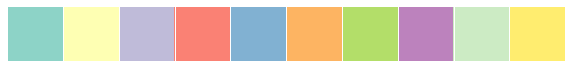

In [14]:
#Caso você queiras usar uma paleta de cores mais interessante:
#**para usar você precisar instalar o pacote seaborn no seu Jupyter!**
#**tipicamente no seu prompt de comando: pip install seaborn**
import seaborn as sns
current_palette = sns.color_palette()
#sns.load_dataset("anscombe")
sns.palplot(current_palette)
sns.set(style="whitegrid")

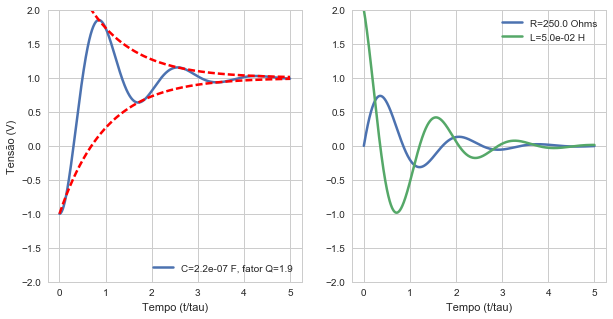

In [21]:
v1=1
L=50e-3
C=0.22e-6
R=250
#----
tau=2*L/R
# gamma=1/tau
omega0=1/(L*C)**0.5
Q=omega0*tau/2
gamma=omega0/(2*Q)
omega=omega0*(1-1/(4*Q**2))**0.5
#----
t = np.linspace(0,5*tau,1000) 
#COMPARE AS EQUAÇÕES ABAIXO COM AS DESCRITAS ACIMAS.
#carga eletrica, 
q= C*v1*(1-2*np.e**(-t*gamma)*omega**(-1)*(omega*np.cos(t*omega)+gamma*np.sin(t*omega)))
ql= C*v1*(1-2*np.e**(-t*gamma)) 
qu= C*v1*(1+2*np.e**(-t*gamma))
#corrente
i= 2*C*np.e**(-t*gamma)*v1*omega**(-1)*(gamma**(2)+omega**(2))*np.sin(t*omega)
#derivada da corrente
didt= 2*C*np.e**(-t*gamma)*v1*omega**(-1)*(gamma**(2)+omega**(2))*(omega*np.cos(t*omega)+-1*gamma*np.sin(t*omega))

#tensao no capacitor, resistor e indutor
vC,vR,vL = q/C, R*i, L*didt

#-----------------------------
#GRAFICOS DE VR(t),VL(t),VL(t)
#-----------------------------
fig, ax = plt.subplots(2, figsize=(10,5),sharey=True);
#plt.style.use('dark_background')
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#----------------------
#GRÁFICO CARTESIANO
ax[0] = plt.subplot(1,2,1) # primeiro grafico de uma matrix 1x2
#capacitor
kk=0 # primeiro subplot
#-----------------------
ax[kk].plot(t/tau,vC,label='C={:2.1e} F, fator Q={:2.1f}'.format(C,Q))
ax[kk].plot(t/tau,ql/C,'r--')
ax[kk].plot(t/tau,qu/C,'r--')
#adjust
ax[kk].set_ylim([-2,2]);
ax[kk].set_xlabel('Tempo (t/tau)');
ax[kk].set_ylabel('Tensão (V)');
ax[kk].grid(True)
ax[kk].legend(loc='lower right')
#resistor  e indutor
kk=1 # segundo  subplot
#-----------------------
ax[kk] = plt.subplot(1,2,2)
ax[kk].plot(t/tau,vR,label='R={:2.1f} Ohms'.format(R))
ax[kk].plot(t/tau,vL,label='L={:2.1e} H'.format(L))
#adjust
ax[kk].set_ylim([-2,2]);
ax[kk].set_xlabel('Tempo (t/tau)');
ax[kk].grid(True)
ax[kk].legend(loc='upper right')


Vamos definir estas funções de forma um pouco mais elegante:

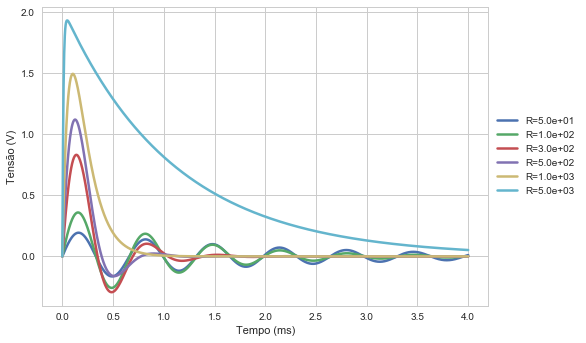

In [16]:
def vres(t,R,L,C):
    #----
    tau=2*L/R
    omega0=1/(L*C)**0.5
    #----
    gamma=1/tau
    Q=omega0*tau/2
    omega=omega0*(1-1/(4*Q**2))**0.5
    #----
    #COMPARE AS EQUAÇÕES ABAIXO COM AS DESCRITAS ACIMAS.
    #carga eletrica, 
    q= C*v1*(1-2*np.e**(-t*gamma)*omega**(-1)*(omega*np.cos(t*omega)+gamma*np.sin(t*omega)))
    ql= C*v1*(1-2*np.e**(-t*gamma)) 
    qu= C*v1*(1+2*np.e**(-t*gamma))
    #corrente
    i= 2*C*np.e**(-t*gamma)*v1*omega**(-1)*(gamma**(2)+omega**(2))*np.sin(t*omega)
    #derivada da corrente
    didt= 2*C*np.e**(-t*gamma)*v1*omega**(-1)*(gamma**(2)+omega**(2))*(omega*np.cos(t*omega)+-1*gamma*np.sin(t*omega))
    #tensao no capacitor, resistor e indutor
    vC,vR,vL = q/C, R*i, L*didt    
    #Mude a linha abaixo para obter os demais componentes..
    # o comando .real é utilizado por imprecisão numérica, que pode gerar números complexos
    return vR.real

t = np.linspace(0,10*tau,2000) 
plt.rc('lines', linewidth=2.5) # ajusta a espessura das linhas
rlist = [5e1,1e2,3e2,5e2,1e3,5e3] # valores de resistencia para graficar
for r in rlist:
    plt.plot(t*1e3,vres(t,r,50e-3,0.22e-6),label='R={:2.1e}'.format(r));
#plt.legend(loc='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Tempo (ms)');
plt.ylabel('Tensão (V)');
plt.savefig('RLC_varR.pdf', bbox_inches='tight')
plt.show()

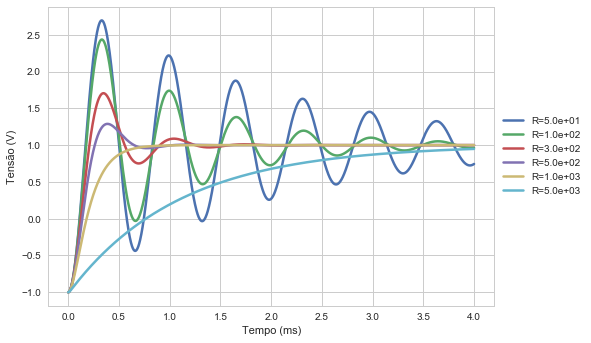

In [17]:
def vcap(t,R,L,C):
    #----
    tau=2*L/R
    omega0=1/(L*C)**0.5
    #----
    gamma=1/tau
    Q=omega0*tau/2
    omega=omega0*(1-1/(4*Q**2))**0.5
    #----
    #COMPARE AS EQUAÇÕES ABAIXO COM AS DESCRITAS ACIMAS.
    #carga eletrica, 
    q= C*v1*(1-2*np.e**(-t*gamma)*omega**(-1)*(omega*np.cos(t*omega)+gamma*np.sin(t*omega)))
    ql= C*v1*(1-2*np.e**(-t*gamma)) 
    qu= C*v1*(1+2*np.e**(-t*gamma))
    #corrente
    i= 2*C*np.e**(-t*gamma)*v1*omega**(-1)*(gamma**(2)+omega**(2))*np.sin(t*omega)
    #derivada da corrente
    didt= 2*C*np.e**(-t*gamma)*v1*omega**(-1)*(gamma**(2)+omega**(2))*(omega*np.cos(t*omega)+-1*gamma*np.sin(t*omega))
    #tensao no capacitor, resistor e indutor
    vC,vR,vL = q/C, R*i, L*didt    
    #Mude a linha abaixo para obter os demais componentes..
    # o comando .real é utilizado por imprecisão numérica, que pode gerar números complexos
    return vC.real

t = np.linspace(0,10*tau,2000) 
plt.rc('lines', linewidth=2.5)
rlist = [5e1,1e2,3e2,5e2,1e3,5e3] # valores de resistencia para graficar
for r in rlist:
    plt.plot(t*1e3,vcap(t,r,50e-3,0.22e-6),label='R={:2.1e}'.format(r));
#plt.legend(loc='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Tempo (ms)');
plt.ylabel('Tensão (V)');
plt.savefig('RLC_varR.pdf', bbox_inches='tight')
plt.show()

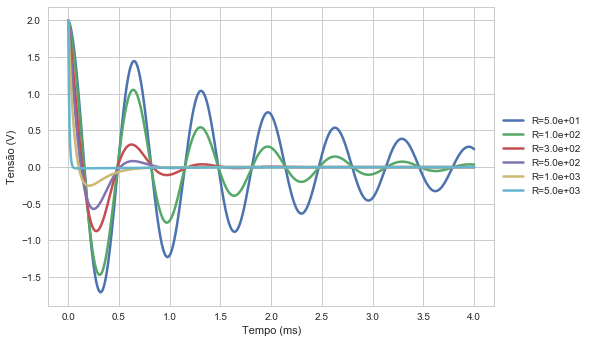

In [18]:
def vind(t,R,L,C):
    #----
    tau=2*L/R
    omega0=1/(L*C)**0.5
    #----
    gamma=1/tau
    Q=omega0*tau/2
    omega=omega0*(1-1/(4*Q**2))**0.5
    #----
    #COMPARE AS EQUAÇÕES ABAIXO COM AS DESCRITAS ACIMAS.
    #carga eletrica, 
    q= C*v1*(1-2*np.e**(-t*gamma)*omega**(-1)*(omega*np.cos(t*omega)+gamma*np.sin(t*omega)))
    ql= C*v1*(1-2*np.e**(-t*gamma)) 
    qu= C*v1*(1+2*np.e**(-t*gamma))
    #corrente
    i= 2*C*np.e**(-t*gamma)*v1*omega**(-1)*(gamma**(2)+omega**(2))*np.sin(t*omega)
    #derivada da corrente
    didt= 2*C*np.e**(-t*gamma)*v1*omega**(-1)*(gamma**(2)+omega**(2))*(omega*np.cos(t*omega)+-1*gamma*np.sin(t*omega))
    #tensao no capacitor, resistor e indutor
    vC,vR,vL = q/C, R*i, L*didt    
    #Mude a linha abaixo para obter os demais componentes..
    # o comando .real é utilizado por imprecisão numérica, que pode gerar números complexos
    return vL.real

t = np.linspace(0,10*tau,2000) 
plt.rc('lines', linewidth=2.5)
rlist = [5e1,1e2,3e2,5e2,1e3,5e3] # valores de resistencia para graficar
for r in rlist:
    plt.plot(t*1e3,vind(t,r,50e-3,0.22e-6),label='R={:2.1e}'.format(r));
#plt.legend(loc='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Tempo (ms)');
plt.ylabel('Tensão (V)');
plt.savefig('RLC_varR.pdf', bbox_inches='tight')
plt.show()